Adapted from https://matplotlib.org/stable/gallery/specialty_plots/anscombe.html

In [1]:
import matplotlib.pyplot as plt
import numpy as np
# Retina mode
%config InlineBackend.figure_format = 'retina'

In [2]:
from latexify import latexify, format_axes

In [3]:
latexify(columns=2)

([], [])

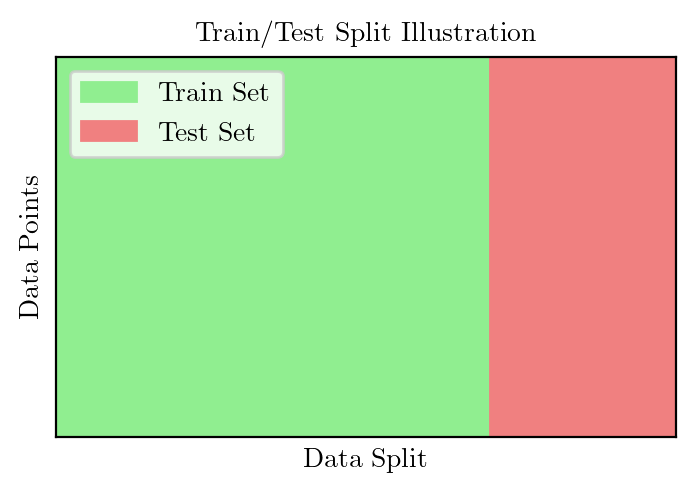

In [4]:
import matplotlib.pyplot as plt

# Define the train/test split percentages
train_percentage = 0.7
test_percentage = 1 - train_percentage

# Create a rectangular plot to represent the train/test split
train_rectangle = plt.Rectangle((0, 0), train_percentage, 1, fill=True, color='lightgreen', label='Train Set')
test_rectangle = plt.Rectangle((train_percentage, 0), test_percentage, 1, fill=True, color='lightcoral', label='Test Set')

# Add rectangles to the plot
plt.gca().add_patch(train_rectangle)
plt.gca().add_patch(test_rectangle)

# Set labels and legend
plt.xlabel('Data Split')
plt.ylabel('Data Points')
plt.title('Train/Test Split Illustration')
plt.legend()

# Remove x and y ticks
plt.xticks([])
plt.yticks([])


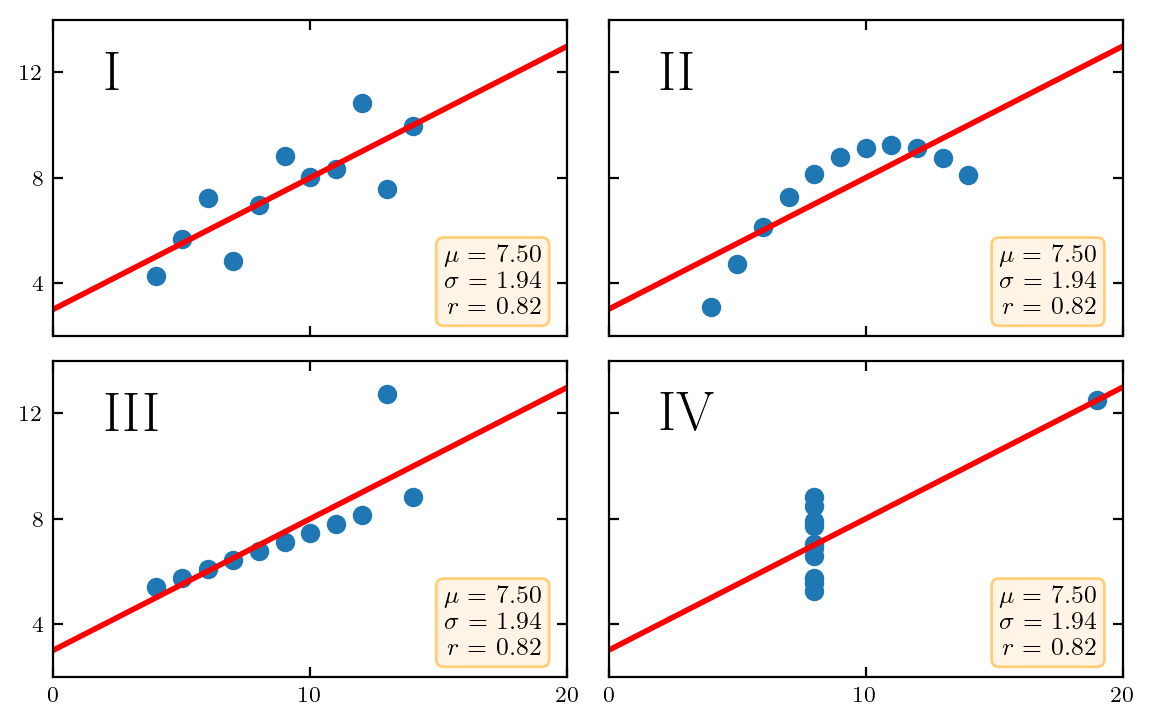

In [16]:
x = [10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5]
y1 = [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68]
y2 = [9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74]
y3 = [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73]
x4 = [8, 8, 8, 8, 8, 8, 8, 19, 8, 8, 8]
y4 = [6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.50, 5.56, 7.91, 6.89]

datasets = {
    'I': (x, y1),
    'II': (x, y2),
    'III': (x, y3),
    'IV': (x4, y4)
}

fig, axs = plt.subplots(2, 2, sharex=True, sharey=True,
                        gridspec_kw={'wspace': 0.08, 'hspace': 0.08})
axs[0, 0].set(xlim=(0, 20), ylim=(2, 14))
axs[0, 0].set(xticks=(0, 10, 20), yticks=(4, 8, 12))

for ax, (label, (x, y)) in zip(axs.flat, datasets.items()):
    ax.text(0.1, 0.9, label, fontsize=20, transform=ax.transAxes, va='top')
    ax.tick_params(direction='in', top=True, right=True)
    ax.plot(x, y, 'o')

    # linear regression
    p1, p0 = np.polyfit(x, y, deg=1)  # slope, intercept
    ax.axline(xy1=(0, p0), slope=p1, color='r', lw=2)

    # add text box for the statistics
    stats = (f'$\\mu$ = {np.mean(y):.2f}\n'
             f'$\\sigma$ = {np.std(y):.2f}\n'
             f'$r$ = {np.corrcoef(x, y)[0][1]:.2f}')
    bbox = dict(boxstyle='round', fc='blanchedalmond', ec='orange', alpha=0.5)
    ax.text(0.95, 0.07, stats, fontsize=9, bbox=bbox,
            transform=ax.transAxes, horizontalalignment='right')
    #format_axes(ax)

plt.savefig("../figures/anscombe.pdf")